<a href="https://colab.research.google.com/github/lakatosgabor/belyegszam_cnn_elemzes/blob/main/belyegszam_cnn_elemzes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = {
    "MODELL": ["CNN_800", "CNN_1200", "CNN_1600", "CNN_2000", "CNN_2400", "CNN_10000",
               "YOLO - MNIST", "YOLO SAJÁT ADATTAL", "SMALL DATA CNN"],
    "KÉP DARAB / OSZTÁLY": [800, 1200, 1600, 2000, 2400, 10000, 7000, 2400, 2400],
    "TESZT PONTOSSÁG": [98.56, 98.79, 98.9, 98.95, 99.02, 99.1, 98.6, 99.5, 99.87],
    "ÉLES TESZT DARAB": [30]*9,
    "HELYES PREDIKCIÓ": [10, 29, 29, 29, 29, 29, 29, 29, 29],
    "HELYTELEN PREDIKCIÓ": [20, 1, 1, 1, 1, 1, 1, 1, 1],
    "FUTÁSI IDŐ (sec)": [1969, 2078, 2712, 3412, 4074, 18280, 1998, 673, 3880],
    "ÖSSZES EPOCH": [130, 130, 130, 130, 130, 130, 10, 10, 130],
    "LEGJOBB EPOCH": [82, 85, 104, 95, 83, 117, 8, 10, 33],
}

df = pd.DataFrame(data)
df_copy = df.copy()

#A „LEGJOBB EPOCH” értéke az összes epoch számához képest
df["LEGJOBB EPOCH (%)"] = df["LEGJOBB EPOCH"] / df["ÖSSZES EPOCH"] * 100

#egy kép feldolgozási ideje per epoch
df["TANULASI_SEBESSEG"] = df["FUTÁSI IDŐ (sec)"] / (df["ÖSSZES EPOCH"] * df["KÉP DARAB / OSZTÁLY"])

df["TANULASI_SEBESSEG_NORM"] = (df["TANULASI_SEBESSEG"] - df["TANULASI_SEBESSEG"].min()) / (df["TANULASI_SEBESSEG"].max() - df["TANULASI_SEBESSEG"].min())

df["FUTASI_IDO_NORM"] = (df["FUTÁSI IDŐ (sec)"] - df["FUTÁSI IDŐ (sec)"].min()) / (df["FUTÁSI IDŐ (sec)"].max() - df["FUTÁSI IDŐ (sec)"].min())
df["PONTOSSAG_NORM"] = (df["TESZT PONTOSSÁG"] - df["TESZT PONTOSSÁG"].min()) / (df["TESZT PONTOSSÁG"].max() - df["TESZT PONTOSSÁG"].min())

# Helyes predikció arány
df["HELYES_ARANY"] = df["HELYES PREDIKCIÓ"] / (df["HELYES PREDIKCIÓ"] + df["HELYTELEN PREDIKCIÓ"])

# Normalizáljuk az oszlopokat 0-1 közé
df["ADAT_NORM"] = (df["KÉP DARAB / OSZTÁLY"] - df["KÉP DARAB / OSZTÁLY"].min()) / (df["KÉP DARAB / OSZTÁLY"].max() - df["KÉP DARAB / OSZTÁLY"].min())

df_sorted = df.sort_values(by="TANULASI_SEBESSEG", ascending=True)

df_sorted



,MODELL,KÉP DARAB / OSZTÁLY,TESZT PONTOSSÁG,ÉLES TESZT DARAB,HELYES PREDIKCIÓ,HELYTELEN PREDIKCIÓ,FUTÁSI IDŐ (sec),ÖSSZES EPOCH,LEGJOBB EPOCH,LEGJOBB EPOCH (%),TANULASI_SEBESSEG,TANULASI_SEBESSEG_NORM,FUTASI_IDO_NORM,PONTOSSAG_NORM,HELYES_ARANY,ADAT_NORM
8,SMALL DATA CNN,2400,99.87,30,29,1,3880,130,33,25.384615,0.012436,0.000000,0.182143,1.000000,0.966667,0.173913
2,CNN_1600,1600,98.90,30,29,1,2712,130,104,80.000000,0.013038,0.037410,0.115806,0.259542,0.966667,0.086957
4,CNN_2400,2400,99.02,30,29,1,4074,130,83,63.846154,0.013058,0.038604,0.193162,0.351145,0.966667,0.173913
3,CNN_2000,2000,98.95,30,29,1,3412,130,95,73.076923,0.013123,0.042664,0.155563,0.297710,0.966667,0.130435
1,CNN_1200,1200,98.79,30,29,1,2078,130,85,65.384615,0.013321,0.054921,0.079798,0.175573,0.966667,0.043478
5,CNN_10000,10000,99.10,30,29,1,18280,130,117,90.000000,0.014062,0.100928,1.000000,0.412214,0.966667,1.000000
0,CNN_800,800,98.56,30,10,20,1969,130,82,63.076923,0.018933,0.403353,0.073607,0.000000,0.333333,0.000000
7,YOLO SAJÁT ADATTAL,2400,99.50,30,29,1,673,10,10,100.000000,0.028042,0.968884,0.000000,0.717557,0.966667,0.173913
6,YOLO - MNIST,7000,98.60,30,29,1,1998,10,8,80.000000,0.028543,1.000000,0.075254,0.030534,0.966667,0.673913


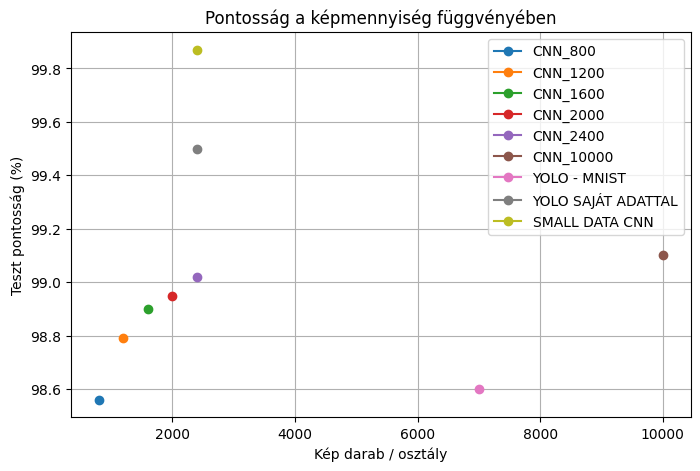

In [ ]:
plt.figure(figsize=(8,5))
for model in df["MODELL"].unique():
    subset = df[df["MODELL"] == model]
    plt.plot(subset["KÉP DARAB / OSZTÁLY"], subset["TESZT PONTOSSÁG"], marker='o', label=model)

plt.title("Pontosság a képmennyiség függvényében")
plt.xlabel("Kép darab / osztály")
plt.ylabel("Teszt pontosság (%)")
plt.legend()
plt.grid(True)
plt.show()
#ALAKRA IS ELKÜLÖNÍTENI A MODELLEKET, MERT EGYÉRTELMŰEN NEM HASONLÍTHATÓ ÖSSZE

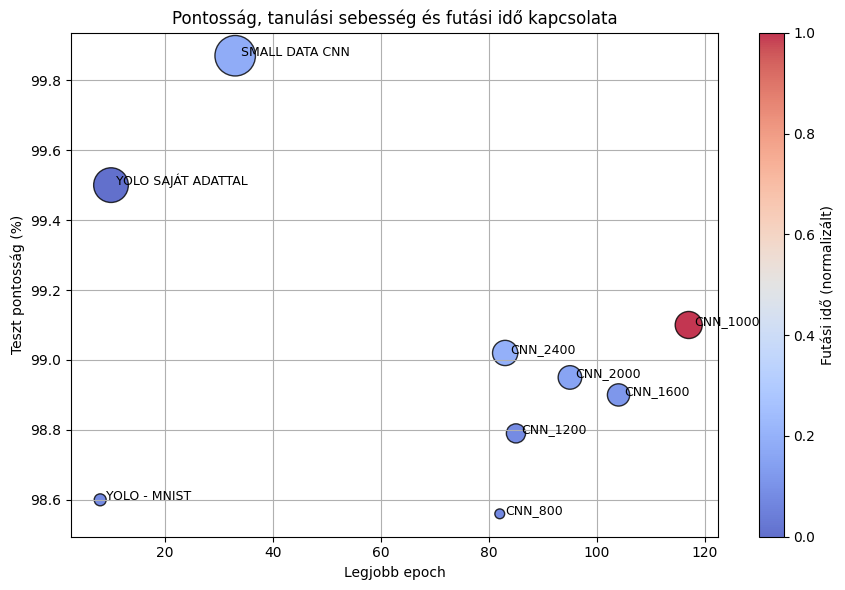

In [ ]:
# --- Buborékdiagram ---
plt.figure(figsize=(9,6))
scatter = plt.scatter(
    df["LEGJOBB EPOCH"],
    df["TESZT PONTOSSÁG"],
    s=df["PONTOSSAG_NORM"]*800 + 50,   # buborék méret
    c=df["FUTASI_IDO_NORM"],           # szín: futási idő
    cmap='coolwarm',
    alpha=0.8,
    edgecolor='black'
)

# Modellnevek kiírása
for i, txt in enumerate(df["MODELL"]):
    plt.annotate(txt, (df["LEGJOBB EPOCH"][i]+1, df["TESZT PONTOSSÁG"][i]), fontsize=9)

plt.title("Pontosság, tanulási sebesség és futási idő kapcsolata")
plt.xlabel("Legjobb epoch")
plt.ylabel("Teszt pontosság (%)")
plt.colorbar(scatter, label="Futási idő (normalizált)")
plt.grid(True)
plt.tight_layout()
plt.show()
#LEGJOBB EPOCH ÉS A FUTÁSI IDŐ

+1: tökéletes pozitív kapcsolat (együtt nőnek)

0: nincs kapcsolat

-1: tökéletes negatív kapcsolat (egyik nő, másik csökken)

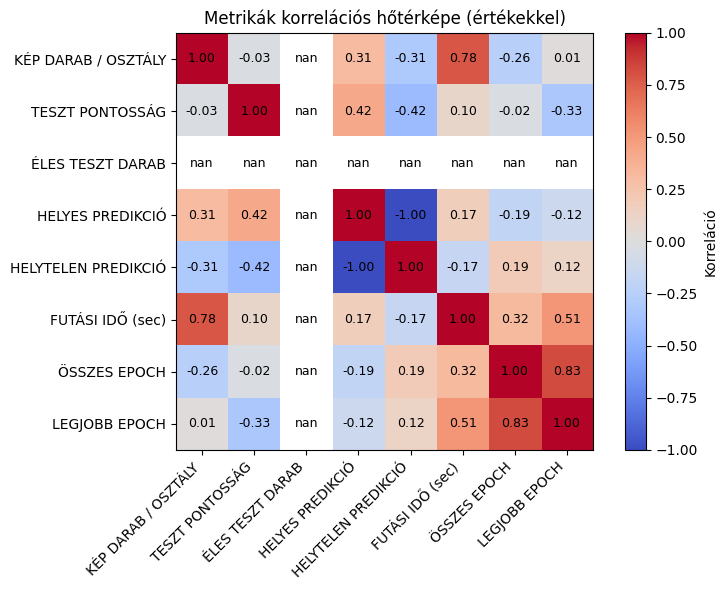

In [ ]:
# --- Korrelációs mátrix ---
corr_matrix = df_copy.drop(columns="MODELL").corr()

# --- Ábra ---
plt.figure(figsize=(8,6))
im = plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")

# --- Színskála ---
plt.colorbar(im, label="Korreláció")

# --- Tengelyfeliratok ---
cols = df_copy.drop(columns="MODELL").columns
plt.xticks(range(len(cols)), cols, rotation=45, ha='right')
plt.yticks(range(len(cols)), cols)

# --- Számok ráírása a cellákba ---
for i in range(len(cols)):
    for j in range(len(cols)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=9)

plt.title("Metrikák korrelációs hőtérképe (értékekkel)")
plt.tight_layout()
plt.show()
#CSAK A CNN-EN VIZSGÁLNI

In [ ]:
# Feltételezzük, hogy df a te adathalmazod
weights = {
    "HELYES_ARANY": 0.4,
    "PONTOSSAG_NORM": 0.3,
    "TANULASI_SEBESSEG_NORM": 0.1,
    "FUTASI_IDO_NORM": 0.1,
    "ADAT_NORM": 0.1
}

df['SCORE'] = (
    df['PONTOSSAG_NORM'] * weights['PONTOSSAG_NORM'] +
    df['HELYES_ARANY'] * weights['HELYES_ARANY'] +
    df['TANULASI_SEBESSEG_NORM'] * weights['TANULASI_SEBESSEG_NORM'] -
    df['FUTASI_IDO_NORM'] * weights['FUTASI_IDO_NORM'] +
    df['ADAT_NORM'] * weights['ADAT_NORM']
)

# Rendezés a legjobb score szerint
df_sorted = df.sort_values('SCORE', ascending=False)
df_sorted

,MODELL,KÉP DARAB / OSZTÁLY,TESZT PONTOSSÁG,ÉLES TESZT DARAB,HELYES PREDIKCIÓ,HELYTELEN PREDIKCIÓ,FUTÁSI IDŐ (sec),ÖSSZES EPOCH,LEGJOBB EPOCH,LEGJOBB EPOCH (%),TANULASI_SEBESSEG,TANULASI_SEBESSEG_NORM,FUTASI_IDO_NORM,PONTOSSAG_NORM,HELYES_ARANY,ADAT_NORM,SCORE
7,YOLO SAJÁT ADATTAL,2400,99.50,30,29,1,673,10,10,100.000000,0.028042,0.968884,0.000000,0.717557,0.966667,0.173913,0.716214
8,SMALL DATA CNN,2400,99.87,30,29,1,3880,130,33,25.384615,0.012436,0.000000,0.182143,1.000000,0.966667,0.173913,0.685844
6,YOLO - MNIST,7000,98.60,30,29,1,1998,10,8,80.000000,0.028543,1.000000,0.075254,0.030534,0.966667,0.673913,0.555693
5,CNN_10000,10000,99.10,30,29,1,18280,130,117,90.000000,0.014062,0.100928,1.000000,0.412214,0.966667,1.000000,0.520424
4,CNN_2400,2400,99.02,30,29,1,4074,130,83,63.846154,0.013058,0.038604,0.193162,0.351145,0.966667,0.173913,0.493946
3,CNN_2000,2000,98.95,30,29,1,3412,130,95,73.076923,0.013123,0.042664,0.155563,0.297710,0.966667,0.130435,0.477733
2,CNN_1600,1600,98.90,30,29,1,2712,130,104,80.000000,0.013038,0.037410,0.115806,0.259542,0.966667,0.086957,0.465385
1,CNN_1200,1200,98.79,30,29,1,2078,130,85,65.384615,0.013321,0.054921,0.079798,0.175573,0.966667,0.043478,0.441199
0,CNN_800,800,98.56,30,10,20,1969,130,82,63.076923,0.018933,0.403353,0.073607,0.000000,0.333333,0.000000,0.166308


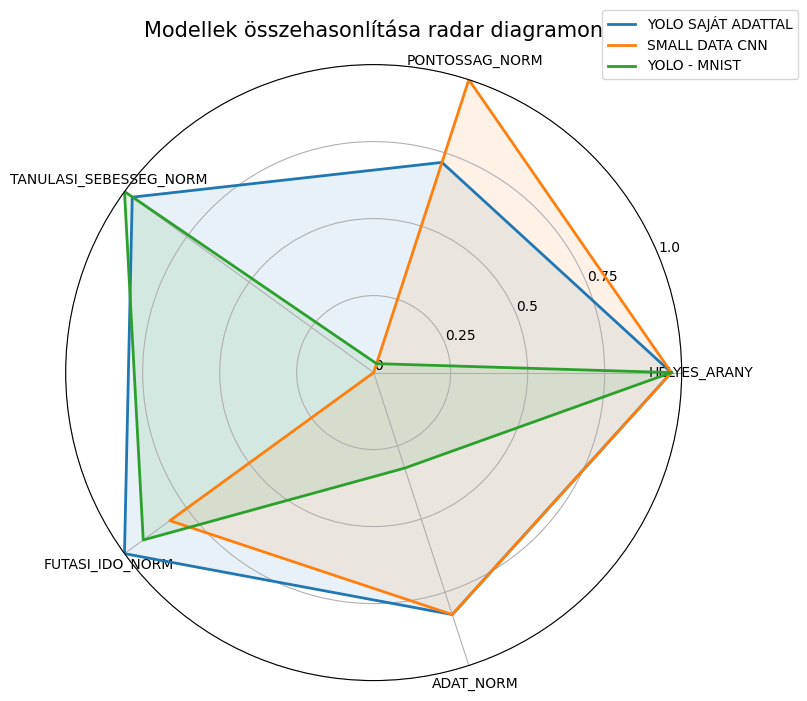

In [ ]:
# Top 3 modell kiválasztása
top3_models = df.nlargest(3, "SCORE")

# --- Radar diagram komponensek ---
categories = ['HELYES_ARANY', 'PONTOSSAG_NORM', 'TANULASI_SEBESSEG_NORM', 'FUTASI_IDO_NORM', 'ADAT_NORM']
N = len(categories)

# --- Szögértékek a radar diagramhoz ---
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # kör bezárása

# --- Radar diagram elkészítése ---
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

# Modell értékek hozzáadása
for i, row in top3_models.iterrows():
    values = row[categories].tolist()
    values = [values[0], values[1], values[2], 1-values[3], 1-values[4]]
    values += values[:1]  # kör bezárása
    ax.plot(angles, values, label=row['MODELL'], linewidth=2)
    ax.fill(angles, values, alpha=0.1)

# Tengelyek beállítása
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticks([0.0,0.25,0.5,0.75,1.0])
ax.set_yticklabels(['0','0.25','0.5','0.75','1.0'])
ax.set_ylim(0,1)

plt.title('Modellek összehasonlítása radar diagramon', size=15, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


#ipari szempontból értékeljük, előkészítés
#helyes költségalapú elemzése a megoldásoknak
#cnn közül melyik a legjobb
#a legjobb cnn-t megnézni a yolo, és small data cnn-nel

#helyes és költésg külön ellenőrzés. # klts csökkentés miatt nem fogadunk el helyesség csökkentsét. az iparnál szinte csak a 100% elfogadott